In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd  # Import pandas
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow import  keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [29]:
# Define the file path to the CSV file
mnist = 'fashion-mnist_test.csv'

# Load the CSV data into a pandas DataFrame
data = pd.read_csv(mnist)

In [30]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [31]:
#f_mnist=tf.keras.datasets.fashion_mnist

In [32]:
tf.__version__

'2.13.0'

In [33]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9755
Test Loss: 0.07937996089458466
Test Accuracy: 0.9754999876022339


In [34]:
# Build the model

i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)



In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [37]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 8s 4ms/step - loss: 0.3179 - accuracy: 0.9080 - val_loss: 0.1424 - val_accuracy: 0.9568
Epoch 2/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1525 - accuracy: 0.9542 - val_loss: 0.1043 - val_accuracy: 0.9694
Epoch 3/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.1160 - accuracy: 0.9648 - val_loss: 0.0881 - val_accuracy: 0.9746
Epoch 4/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0936 - accuracy: 0.9706 - val_loss: 0.0809 - val_accuracy: 0.9768
Epoch 5/50
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0793 - accuracy: 0.9750 - val_loss: 0.0852 - val_accuracy: 0.9726
Epoch 6/50
1594/1594 [==============================] - 7s 5ms/step - loss: 0.0707 - accuracy: 0.9778 - val_loss: 0.0729 - val_accuracy: 0.9790
Epoch 7/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.0729 - val_accuracy:

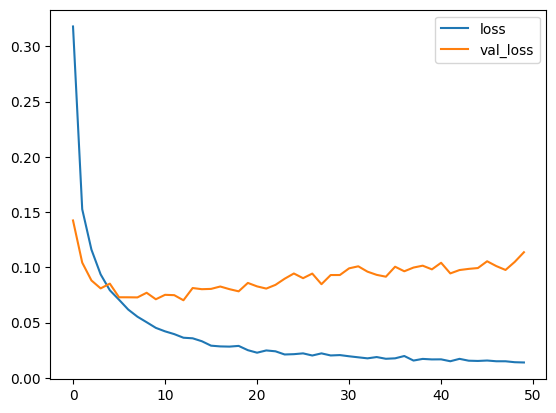

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

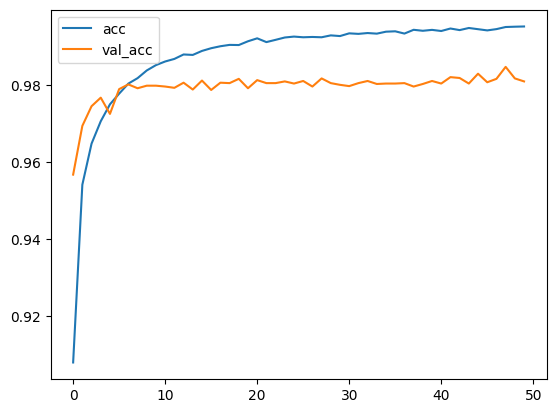

In [39]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()


In [40]:
# Evaluate the model
print(model.evaluate(x_test, y_test, verbose='False'))

[0.12064793705940247, 0.980400025844574]


In [41]:
# Predictions by the model
p_test =  np.argmax(model.predict(x_test), axis=-1)
# model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 2ms/step


In [42]:
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
print(confusion_matrix(y_test,p_test))

[[ 971    0    1    1    0    1    3    1    2    0]
 [   0 1128    1    2    0    1    2    1    0    0]
 [   3    2 1014    1    3    0    2    5    2    0]
 [   0    0    2  994    0    3    0    4    4    3]
 [   2    0    4    0  958    0    2    1    1   14]
 [   3    2    0    7    2  869    3    0    3    3]
 [   5    2    2    0    2    4  943    0    0    0]
 [   2    3   12    1    1    0    0 1004    1    4]
 [   3    0    4    4    4    3    2    4  943    7]
 [   2    3    0    4   10    3    0    7    0  980]]


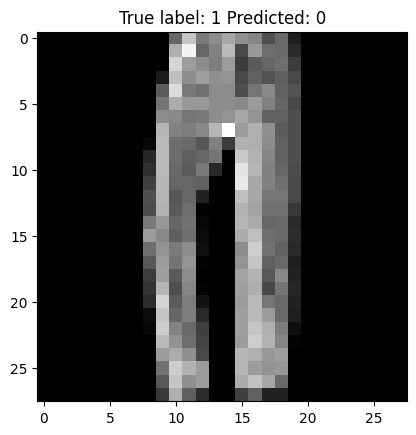

In [71]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));



In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shape of the training data
print("x_train.shape:", x_train.shape)


4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [95]:


# Create an ANN model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model.add(Dense(128, activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation for 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


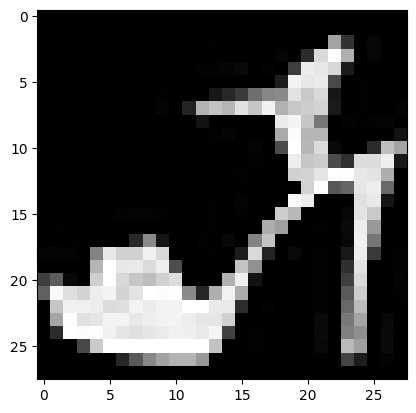

In [88]:
plt.imshow(x_train[9,],cmap="gray")

In [49]:
#normalized between zero and one¶

x_train,x_test=x_train/255.0,x_test/255.0
x_train[1,]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.53787005e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.30526720e-04, 2.89119569e-03,
        1.58400615e-03, 8.30449827e-04, 7.38177624e-04, 6.61284121e-04,
        1.33794694e-03, 2.58362168e-03, 2.04536717e-03, 2.46059208e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.53787005e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.53556324e-04,
        2.09150327e-03, 3.36793541e-03, 3.32179931e-03, 3.50634371e-03,
        3.62937332e-03, 3.92156863e-03, 3.92156863e-03, 3.92156863e-03,
        3.92156863e-03, 3.33717801e-03, 3.30642061e-03, 3.90618993e-03,
        3.55247982e-03, 2.46059208e-03, 6.92041522e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [50]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(75,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 75)                7575      
                                                                 
 dense_8 (Dense)             (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.layers

In [53]:
weights,bias = model.layers[1].get_weights()
weights

array([[ 0.01886315,  0.04134154, -0.03213321, ..., -0.02533707,
         0.06416421, -0.08185152],
       [ 0.01105605,  0.02994992, -0.04293451, ...,  0.00964294,
        -0.02178563, -0.07821493],
       [ 0.03505863, -0.03648088, -0.0650146 , ...,  0.04197704,
        -0.01798981,  0.03882657],
       ...,
       [-0.05824813, -0.05958328,  0.055443  , ...,  0.01748749,
         0.07810047,  0.07916887],
       [-0.06538007,  0.03517698, -0.04184345, ..., -0.06828699,
        -0.00546803, -0.0610744 ],
       [ 0.07937606,  0.05129349, -0.04225222, ..., -0.04436714,
        -0.03877831,  0.0125311 ]], dtype=float32)

In [54]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

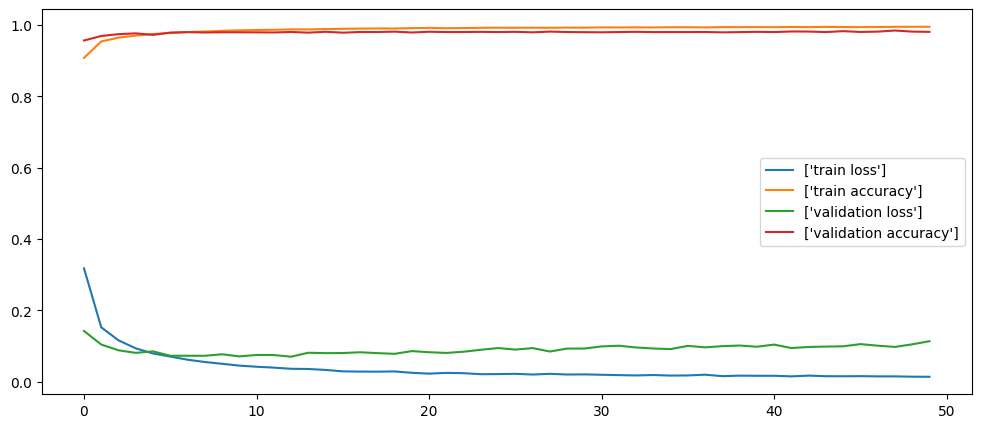

In [55]:


fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'],label=['train loss'])
ax.plot(history.history['accuracy'],label=['train accuracy'])
ax.plot(history.history['val_loss'],label=['validation loss'])
ax.plot(history.history['val_accuracy'],label=['validation accuracy'])
ax.legend()



In [56]:
print(history.history)


{'loss': [0.31788870692253113, 0.15254750847816467, 0.11604882776737213, 0.09362993389368057, 0.07925813645124435, 0.07067307829856873, 0.06177661567926407, 0.05532778427004814, 0.05032281577587128, 0.04522326588630676, 0.04207395017147064, 0.03956485912203789, 0.036299142986536026, 0.035784799605607986, 0.03313054144382477, 0.029115349054336548, 0.028448017314076424, 0.02826504409313202, 0.028901232406497, 0.025036565959453583, 0.022755902260541916, 0.024801384657621384, 0.02401639148592949, 0.021142402663826942, 0.021423853933811188, 0.02215000055730343, 0.020216315984725952, 0.022147228941321373, 0.020259931683540344, 0.020600516349077225, 0.019520755857229233, 0.01857437752187252, 0.01764390803873539, 0.018821679055690765, 0.017256680876016617, 0.017662448808550835, 0.019759690389037132, 0.0156523697078228, 0.017139099538326263, 0.016682613641023636, 0.016746273264288902, 0.015025531873106956, 0.017193935811519623, 0.015516539104282856, 0.015289172530174255, 0.01567683555185795, 0.

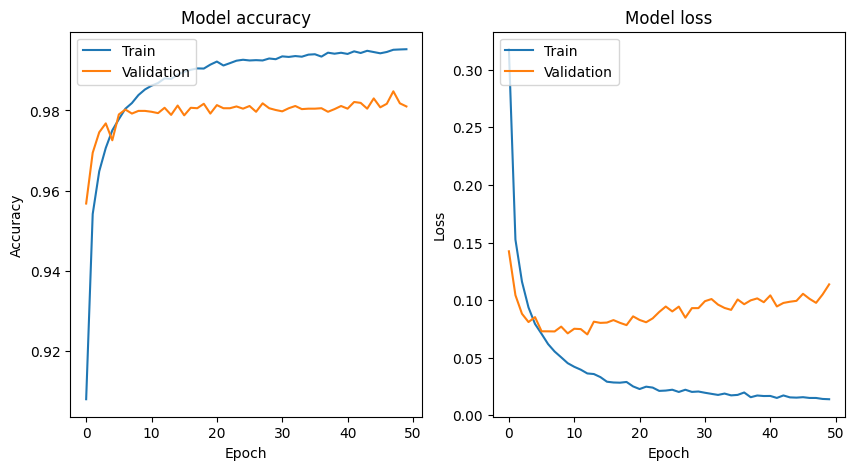

In [57]:

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [58]:
#Build the model

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [59]:
#Compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [60]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [61]:
# SECTION 1: Data Preparation
# Load the fashion-mnist dataset from a CSV file and normalize the data
mnist = 'fashion-mnist_test.csv'  # Replace with the actual file path
data = pd.read_csv(mnist)


In [62]:
# Load the standard MNIST dataset and normalize it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [89]:
# SECTION 2: Model Architecture
# Define an ANN model for fashion-mnist
i = Input(shape=data.shape[1]-1)
x = Dense(128, activation='relu')(i)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
model_fashion = Model(i, x)

In [90]:
# Compile the fashion-mnist model
model_fashion.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
# Define an ANN model for standard MNIST
model_mnist = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the MNIST model
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [93]:
# SECTION 3-4: Training and Evaluation
# Train the fashion-mnist model
history_fashion = model_fashion.fit(data.drop('label', axis=1).values, data['label'].values, epochs=10, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 1s 5ms/step - loss: 1.4144 - accuracy: 0.5871 - val_loss: 1.2009 - val_accuracy: 0.6145
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 1.1515 - accuracy: 0.6144 - val_loss: 1.0233 - val_accuracy: 0.6835
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 1.0941 - accuracy: 0.6223 - val_loss: 0.9986 - val_accuracy: 0.6585
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 1.0388 - accuracy: 0.6332 - val_loss: 0.8946 - val_accuracy: 0.6865
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.9943 - accuracy: 0.6472 - val_loss: 0.8595 - val_accuracy: 0.7000
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.9830 - accuracy: 0.6504 - val_loss: 0.9336 - val_accuracy: 0.7045
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.9069 - accuracy: 0.6758 - val_loss: 0.9011 - val_accuracy: 0.7005
Epoch 

In [67]:

# Load the fashion-mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
# Evaluate the fashion-mnist model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Fashion-MNIST Model Test Accuracy:", test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 2.3169 - accuracy: 0.0856
Fashion-MNIST Model Test Accuracy: 0.08560000360012054


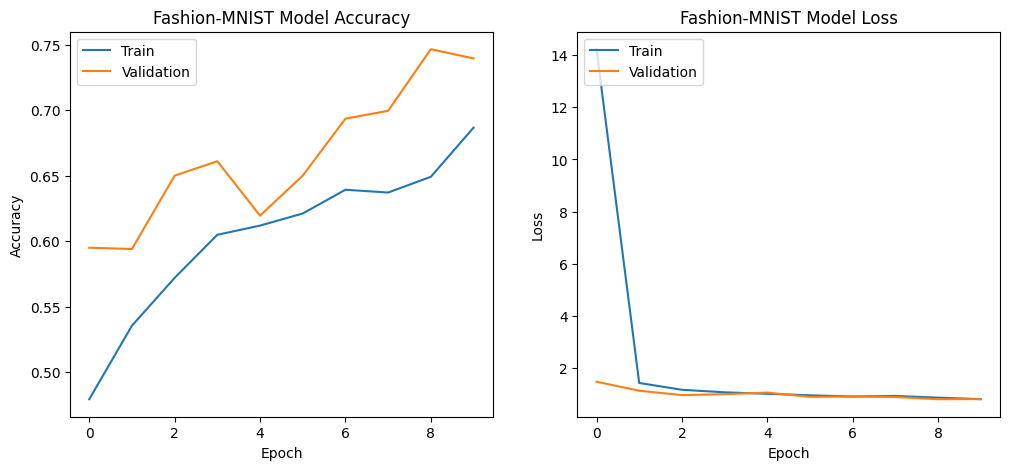

In [68]:
# SECTION 5: Visualization
# Plot training history for fashion-mnist model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fashion.history['accuracy'])
plt.plot(history_fashion.history['val_accuracy'])
plt.title('Fashion-MNIST Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_fashion.history['loss'])
plt.plot(history_fashion.history['val_loss'])
plt.title('Fashion-MNIST Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')


In [70]:
# Training and Evaluation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 80s 50ms/step - loss: 0.1272 - accuracy: 0.9525 - val_loss: 0.2513 - val_accuracy: 0.9170
Epoch 2/10
1594/1594 [==============================] - 71s 45ms/step - loss: 0.1074 - accuracy: 0.9606 - val_loss: 0.2490 - val_accuracy: 0.9176
Epoch 3/10
1594/1594 [==============================] - 78s 49ms/step - loss: 0.0898 - accuracy: 0.9672 - val_loss: 0.2686 - val_accuracy: 0.9222
Epoch 4/10
1594/1594 [==============================] - 71s 45ms/step - loss: 0.0721 - accuracy: 0.9732 - val_loss: 0.2715 - val_accuracy: 0.9203
Epoch 5/10
1594/1594 [==============================] - 70s 44ms/step - loss: 0.0617 - accuracy: 0.9777 - val_loss: 0.2986 - val_accuracy: 0.9170
Epoch 6/10
1594/1594 [==============================] - 70s 44ms/step - loss: 0.0511 - accuracy: 0.9814 - val_loss: 0.4072 - val_accuracy: 0.9111
Epoch 7/10
1594/1594 [==============================] - 73s 46ms/step - loss: 0.0459 - accuracy: 0.9833 - val_loss: 0.3693 -

In [79]:
## Training and Evaluation
#history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

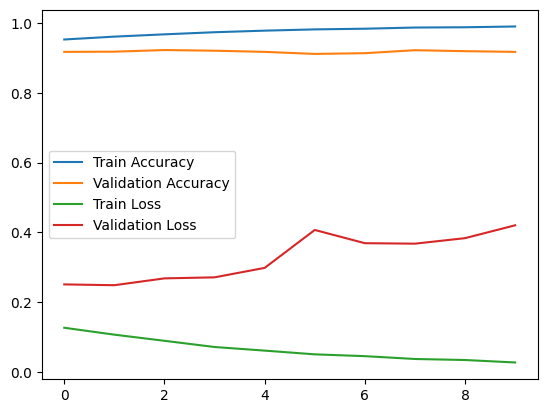

In [73]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [74]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions by the model
p_test = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 10s 31ms/step - loss: 0.4471 - accuracy: 0.9161
Test Loss: 0.447125107049942
Test Accuracy: 0.916100025177002
313/313 [==============================] - 7s 22ms/step


In [75]:
# Classification Report and Confusion Matrix
print(classification_report(y_test, p_test))
cm = confusion_matrix(y_test, p_test)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.90      0.86      1000
           3       0.93      0.91      0.92      1000
           4       0.90      0.84      0.87      1000
           5       0.99      0.98      0.99      1000
           6       0.78      0.75      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Text(0.5, 1.0, 'True label: 6 Predicted: 4')

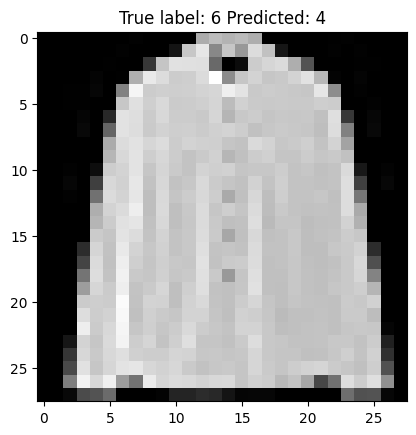

In [84]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))